Data Science + Social Justice<br>
Python Basics II <br>
Created by Tom van Nuenen (tom.van_nuenen@kcl.ac.uk)

# Pandas and seaborn

By the end of this Notebook, you should be:

* Able to load data from a CSV file into a Pandas dataframe.
* Able to query data from a dataframe based on a condition.
* Able to graph your findings using Seaborn

## Introduction to Pandas

Pandas allows us to more easily perform complicated analysis using datasets. When we have complex and sometimes messy data, Pandas will take it and help us manage it. Think of it like a spreadsheet tool, but for programming in Python.

First let's import pandas, numpy and seaborn

In [5]:
import pandas as pd    # pandas is conventionally shortened to pd
import numpy as np     # numpy probides useful mathematical functions
import seaborn as sns  # seaborn lets us draw graphs easily

# Use seaborn's default graphing theme
sns.set_theme()

Now, let's create a **dataframe**. Think of a dataframe like a table that we can query to get results out of, and then use to perform statistical and algorithmic operations.

Pandas makes opening a CSV file and seeing a summary of the data easy. We use the `read_csv()` method for this.

**Remember you need to give the correct path to the file you are trying to read**. If the .csv file is in the same folder as this .ipynb file then you just have to give the filename.)

We'll store our dataframe as `df`, which is the conventional name for a dataframe. You can call it whatever you want, but keep it consistant and short as you'll be writing it a lot!

In [3]:
import os
# We include two ../ because we want to go two levels up in the file structure
os.chdir('../../Data')

# Coding for Social Justice

Even if you’re new to programming, the ability to collect and analyze data independently means you no longer have to take politicans and others in power at their word when they tell you what “the data” says. You can find data, evalute it, analyze it, and present your own findings. This will help you decide who you can trust, and help you find a voice in speaking truth to power.

Working through these kinds of exercises early on can also help you think about how you might use what you’re learning about programming to address systemic issues at a personal, local, national, and international level.

One of the most famous datasets that allows us to start thinking about social justice is the Titanic dataset. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. This dataset can be used to predict whether a given passenger survived or not.

As we go through this, I want you to reflect on one particularity of working with data about terrifying events: the ways in which it comes to seem as something "distant". These abstracted datapoints allow us to pursue all kinds of hypotheses about why passengers survived the Titanic's disaster – but what remains buried under all this analysis is the voices of these people. 

In [118]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Notice how it printed this without us even needing to use the `print()` function!

The `head()` method shows the top 5 'series' (aka rows). You can ask it to show more than 5 by passing it an integer.

In [119]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


The `tail()` method works the same way, but works from the bottom instead of the top.

### Exercise 1

<font color=purple>Using the `tail()` method, print the bottom three rows</font>

In [120]:
# Your code here

df.tail(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


When working dataframes with loads of columns, Pandas will hide some of the columns. Remember that you can print out all names of the columns using the `.columns` method

In [121]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

What if we want to show only a few columns, or reorder them? You can narrow down and rearrange your df like this.

Note how we're also applying the head method onto this.

In [122]:
df[['Name', 'Pclass']].head()

,Name,Pclass
0,Mr. Owen Harris Braund,3
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1
2,Miss. Laina Heikkinen,3
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1
4,Mr. William Henry Allen,3


Pandas also makes it easy to select a specific row in a dataframe using a conditional. For example, if we wanted to select just information about Islington, we could use the code below.  You can use `==`, `<`, `<=`, `>` or `>=` `&` or `|` 

In [123]:
df[df.Age > 60]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
33,0,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000
53,0,1,Mr. Engelhart Cornelius Ostby,male,65.0,0,1,61.9792
63,0,1,Mr. Albert A Stewart,male,64.0,0,0,27.7208
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,0,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
169,0,1,Mr. Wyckoff Van der hoef,male,61.0,0,0,33.5000
251,0,1,Mr. William Thomas Stead,male,62.0,0,0,26.5500
273,1,1,Miss. Kornelia Theodosia Andrews,female,63.0,1,0,77.9583
278,0,3,Mr. Frank Duane,male,65.0,0,0,7.7500
324,0,3,Mr. Johan Hansen Nysveen,male,61.0,0,0,6.2375


That's nice but it'd be better if it was ordered by the area itself. For that you should add the `.sort_values()` method. The arguments it takes are the name of the column (as a string), and `ascending=False` if it's ordering things the wrong way around.

In [124]:
df[df.Age > 60].sort_values("Age", ascending=False)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000
847,0,3,Mr. Johan Svensson,male,74.0,0,0,7.7750
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
115,0,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
669,0,2,Mr. Henry Michael Mitchell,male,70.0,0,0,10.5000
741,0,1,Capt. Edward Gifford Crosby,male,70.0,1,1,71.0000
535,0,3,Mr. Samuel Beard Risien,male,69.0,0,0,14.5000
33,0,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000
508,0,3,Mr. James Webber,male,66.0,0,0,8.0500


### Exercise 2

<font color=purple>Using the `sort_values()` method, sort the fare paid in descending order.</font>

In [125]:
# Your code here






## Grouping data

Using the `groupby()` method we can group our data by passenger class. We also use the `mean()` method to get the mean of each of these groups.

In [126]:
df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.244353


Let's also include details about the passengers' sex.

In [127]:
df[['Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

It turns out the sex of the passenger and the class in which they travelled (Pclass) seem to correlate strongly with survival.

### Data visualisation

Next, let's visualise our dataframes using the Seaborn library. To improve your skills, you'll want to read seaborn's documentation yourself: https://seaborn.pydata.org

Seaborn has three basic level graphing methods `relplot()`, `distplot()` and `catplot()`, which each has a number of submethods which are basically shorthands for the main methods.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">



### Catplot
Let's begin with a categorical plot - a one dimentional graph - which allows us to place a categorical (non-numerical) value on the x axis. Let's also add information about whether a passenger survived using `hue=`.

Have a look at what happens when you remove the `hue=` part as well.

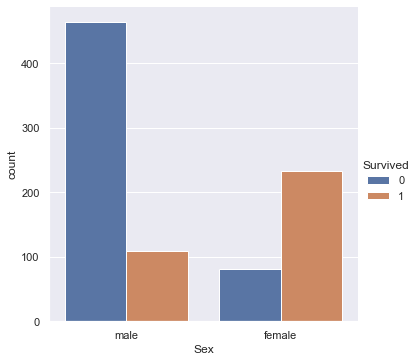

In [128]:
sns.catplot(x = "Sex", hue ="Survived", 
kind ="count", data = df)

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

### Exercise 3

<font color=purple>Create a `scatterplot` to visualize the age against the fare paid. </font>

<AxesSubplot:xlabel='Age', ylabel='Fare'>

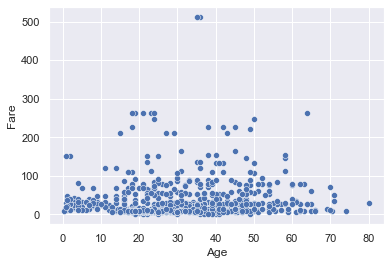

In [137]:
# Your code here
sns.scatterplot(data=df, x='Age', y='Fare') 


### Heatmap
Using Seaborn we can also create a heatmap – this time looking at the class a passenger was traveling in ('Pclass') and whether they survived.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

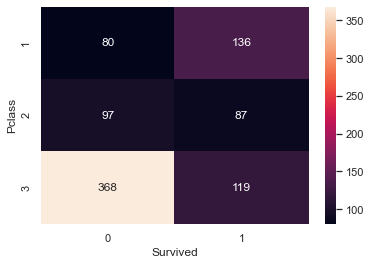

In [41]:
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

This heatmap helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

### Violinplot

Next, let's plot whether sex and age have an impact on survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

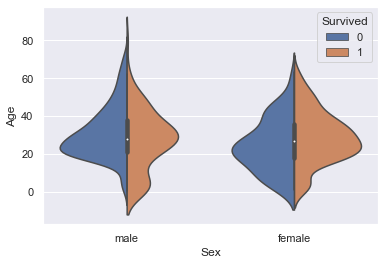

In [65]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)


This graph gives a summary of the age range of men, women and children who were saved. The survival rate is:

- Good for children.
- High for women in the age range 20-50.
- Less for men as age increases.

### Barplot
Finally, let's use a barplot to have a look at whether the fare paid influences changes of survival.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

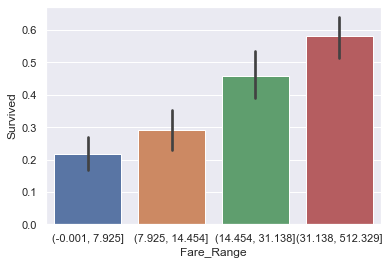

In [44]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins (as done for the Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate increases.

## Correlations
It's not enough to just use pretty graphs to describe our findings in data analysis. They merely *illustrate* an argument which we make with numbers. 

Can we find correlation between passenger class and survival rate?

In [46]:
df['Survived'].corr(df['Age'])

-0.059665126330249965

Next, let's look at sex and survival rate. `str.get_dummies` creates dummy (integer) variables that correspond to the string values, and `corrwith` is another way to compute correlation when you need to do so between a mixture of rows and columns (`corr` just works with columns only).


In [47]:
df['Sex'].str.get_dummies().corrwith(df['Survived']/df['Survived'].max())

female    0.542152
male     -0.542152
dtype: float64

So it turns out that a passenger's being a man was strongly negatively correlated with his survival aboard the Titanic, and a passenger's being older was very weakly negatively correlated with survival.


# Police violence data

<font color=red>**Content warning.** The datasets in the following part of the notebook refers to people killed by police. It is highly sensitive data and you should only engage with it if you feel you are able to.</font>

The Washington Post maintains a database containing records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.
See [here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) for more information.

In [147]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Each row has the following variables:

- id: a unique identifier for each victim
- name: the name of the victim
- date: the date of the fatal shooting in YYYY-MM-DD format
- manner_of_death:
    - shot
    - shot and Tasered
    - armed: indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm

    - undetermined: it is not known whether or not the victim had a weapon
    - unknown: the victim was armed, but it is not known what the object was
    - unarmed: the victim was not armed
    
- age: the age of the victim
- gender: the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    - M: Male
    - F: Female
    - None: unknown
    
- race:
    - W: White, non-Hispanic
    - B: Black, non-Hispanic
    - A: Asian
    - N: Native American
    - H: Hispanic
    - O: Other
    - None: unknown
    
- city: the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
- state: two-letter postal code abbreviation
- signs of mental illness: News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
- threat_level: The threat_level column was used to flag incidents for the [story](http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/) by Amy Brittain in October 2015. As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

- flee: News reports have indicated the victim was moving away from officers
    - Foot
    - Car
    - Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.

- body_camera: News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

- latitude and longitude: the location of the shooting expressed as WGS84 coordinates, geocoded from addresses. The coordinates are rounded to 3 decimal places, meaning they have a precision of about 80-100 meters within the contiguous U.S.

- is_geocoding_exact: reflects the accuracy of the coordinates. true means that the coordinates are for the location of the shooting (within approximately 100 meters), while false means that coordinates are for the centroid of a larger region, such as the city or county where the shooting happened.

Let's have a look at the mean age and sign of mental illness (the latter is stored in Boolean yes/no values which we can average as well).

In [148]:
df[['age','race', 'signs_of_mental_illness']].groupby(['race']).mean()

,age,signs_of_mental_illness
race,,
A,36.568627,0.257143
B,32.711182,0.155388
H,33.701605,0.174472
N,32.200000,0.175824
O,32.608696,0.212766
W,40.020504,0.288690


Looks like mental illness was most often reported among white and asian vicitims.

<AxesSubplot:xlabel='race', ylabel='age'>

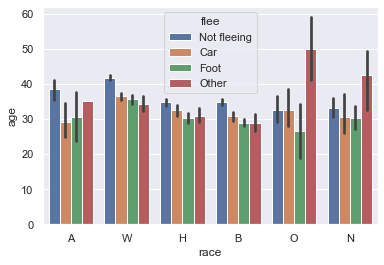

In [166]:
sns.barplot(x ="race", y ="age", hue ="flee",
data = df)

## More data - Mapping Police Violence
Finally, let's have a quick look at Mapping Police Violence, another comprehensive accounting of people killed by police since 2013. Please see
https://mappingpoliceviolence.org/ for more information. 

If you’re curious about the data, it’s well worth reading the descriptions of the data collection methods, and following links to other projects that Mapping Police Violence is built on. Following these links will also lead you to a variety of projects with similar aims.

In [141]:
df = pd.read_csv('mapping_police_violence.csv')
df.head()

,victim_name,victim_age,victim_gender,victim_race,victim_img_url,incident_date_m-d-y,incident_address,incident_city,incident_state,incident_zip,...,congressional_district,current_representative_last_name,current_representative_first_name,current_representative_party,chief_prosecutor,prosecutor_race,prosecutor_gender,chief_prosecutor_political_party,chief_prosecutor_term,prosecutor_in_court
0,Name withheld by police,27,Male,Unknown race,NaN,1/20/2022,NaN,Bronx,NY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,Unknown,Unknown,Unknown race,NaN,1/20/2022,NaN,San Francisco,CA,94128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name withheld by police,Unknown,Male,Unknown race,NaN,1/20/2022,66th Street Southeast and Axis Avenue,Lacey,WA,98513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ronald W. Flowers II,Unknown,Male,Unknown race,NaN,1/19/2022,County Road 47 and McCoy Road,Perdido,AL,36562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Name withheld by police,Unknown,Male,Unknown race,NaN,1/19/2022,Hedding Street and Park Avenue,San Jose,CA,95126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df.columns

Index(['victim_name', 'victim_age', 'victim_gender', 'victim_race',
       'victim_img_url', 'incident_date_m-d-y', 'incident_address',
       'incident_city', 'incident_state', 'incident_zip', 'incident_county',
       'responsible_agency', 'responsible_agency_id',
       'incident_cause_of_death', 'incident_description',
       'official_disposition_of_death', 'criminal_charges', 'links',
       'symptoms_mental_illness', 'armed_unarmed_status', 'alleged_weapon',
       'alleged_threat_level', 'fleeing', 'bod_cam', 'WaPo_id',
       'off-duty_killing', 'incident_geography', 'mpv_id',
       'fatal_encounters_id', 'encounters_type',
       'reported_reason_for_encounter', 'census_tract_code',
       'median_household_income_ACS_census_tract', 'latitude', 'longitude',
       'total_population_census_tract_2019',
       'white_non-hispanic_percent_population',
       'black_non-hispanic_percent_population',
       'native_american_percent_population', 'asian_percent_population',
       

There are a lot of columns / features here that are worthy of exploration, and I will leave it up to you to decide if you want to engage with this. 

# Reflection

- Retrieving information from community-based data can and often is an extractive exercise, where not enough time is spent thinking about how to give back to the community that data is taken from. This is something to always consider when beginning a data science project.

- The inclusion of certain features, such as the median household income of the census tract in which the incident took place, or the political party of the chief prosecutioner, can be valuable data that is the result of the hard work of researchers. It shows how the inclusion of certain features can change our perception of the data, and how important it is to think through **which kinds of features could be important.**